
# 🔍 Exploración No Supervisada en Salud

Este notebook muestra cómo aplicar **clustering (K-Means)** y **reducción de dimensionalidad (t-SNE)** a un dataset de salud, sin usar etiquetas. El objetivo es encontrar grupos similares de pacientes y visualizar la estructura oculta en los datos.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
# Dataset: Heart Disease (disponible en Kaggle o UCI)
# Aquí usamos una versión pública
url = "https://gist.githubusercontent.com/trantuyen082001/1fc2f5c0ad1507f40e721e6d18b34138/raw/heart.csv"
df = pd.read_csv(url)

df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [5]:
df.sex.value_counts()

,count
sex,
1,207
0,96


In [6]:
pd.crosstab(df.output, df.sex)

sex,0,1
output,,
0,24,114
1,72,93


| Columna                     | Descripción                                                   | Valores / Unidad                                                                                          |
| --------------------------- | ------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------- |
| `age`                       | Edad del paciente                                             | Años                                                                                                      |
| `sex`                       | Sexo: 1 = hombre, 0 = mujer                                   | Categórica binaria                                                                                        |
| `cp`                        | Tipo de dolor de pecho                                        | 1 = angina típica, 2 = atípica, 3 = no anginal, 4 = asintomático                                          |
| `trestbps`                  | Presión arterial en reposo                                    | mm Hg                                                                                                     |
| `chol`                      | Colesterol sérico                                             | mg/dL                                                                                                     |
| `fbs`                       | Azúcar en ayunas > 120 mg/dL (sí/no)                          | 1 = verdadero, 0 = falso                                                                                  |
| `restecg`                   | Resultados del ECG en reposo                                  | 0 = normal; 1 = anormalidad ST-T; 2 = hipertrofia ventricular izquierda                                   |
| `thalach`                   | Frecuencia cardíaca máxima alcanzada                          | Latidos por minuto                                                                                        |
| `exang`                     | Angina inducida por ejercicio (sí/no)                         | 1 = sí; 0 = no                                                                                            |
| `oldpeak`                   | Depresión ST inducida por ejercicio respecto al reposo        | Valor numérico (mm)                                                                                       |
| `slope`                     | Pendiente del segmento ST en el pico de ejercicio             | 1 = en ascenso; 2 = plano; 3 = descendente                                                                |
| `ca`                        | Número de vasos principales (0–3) coloreados por fluoroscopia | Entero                                                                                                    |
| `thal`                      | Tipo de defecto “thalásmico”                                  | 3 = normal; 6 = defecto fijo; 7 = defecto reversible                                                      |
| `num` o `output` o `target` | Diagnóstico de enfermedad cardiaca                            | 0 = no enfermedad (< 50 % estrechamiento); 1 = enfermedad (> 50 % estrechamiento en al menos una arteria) |


In [7]:
# Eliminamos columnas no numéricas si existieran (en este dataset no hay)
# y estandarizamos los datos
X = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
# Elegimos 3 clusters arbitrariamente
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters


In [9]:
# Reducimos a 2 dimensiones para visualizar
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)

df['TSNE-1'] = X_tsne[:, 0]
df['TSNE-2'] = X_tsne[:, 1]


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


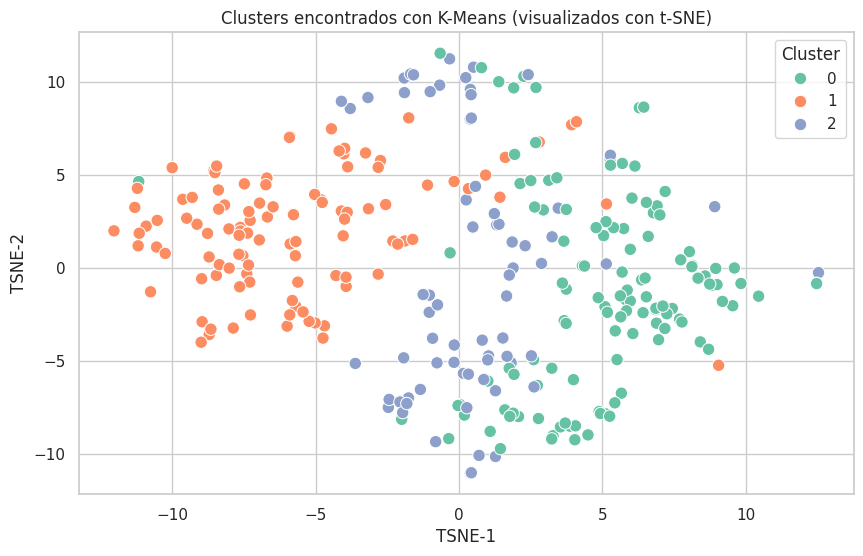

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TSNE-1', y='TSNE-2', hue='Cluster', palette='Set2', s=80)
plt.title("Clusters encontrados con K-Means (visualizados con t-SNE)")
plt.show()


Este es el resultado de aplicar K-Means con 3 clusters al dataset de enfermedades cardíacas, y luego reducir la dimensionalidad con t-SNE para poder visualizar los grupos en 2D.



¿Qué estamos viendo?
“Cada punto representa a un paciente, según sus variables de salud (edad, presión, colesterol, etc.), pero proyectado en dos dimensiones gracias a t-SNE, que trata de preservar la cercanía entre los puntos en un espacio complejo.”

Los colores indican los clusters que el algoritmo K-Means encontró, sin conocer el diagnóstico real.

Notamos que hay cierta separación entre grupos, pero también solapamientos (lo cual es esperable en salud).

“Esto es un ejemplo clásico de aprendizaje no supervisado. No le dijimos al modelo quién estaba enfermo. Simplemente le pedimos: ‘dime si ves grupos naturales entre estos pacientes’.

Y si comparamos con el modelo supervisado, que sí sabe quién está enfermo, podemos debatir: ¿cuándo confiaríamos en uno o en otro? ¿Qué nos dice esto sobre la estructura de los datos?”